In [38]:
from pathlib import Path
import yaml
import pandas as pd

config_path = Path("../config.yaml")
with open(config_path, "r") as f:
    config = yaml.safe_load(f)

csv_relative_path = config["data"]["clean_data_csv"]["clean_data_v3_irma"]
csv_path = config_path.parent / csv_relative_path

df = pd.read_csv(csv_path)
print(df.shape)
df.head()

(7566, 46)


,selling_price,km_driven,owner,mileage,engine,max_power,torque,seats,fuel_Diesel,fuel_LPG,...,brand_Nissan,brand_Opel,brand_Peugeot,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo,car_age
0,0.488000,0.341286,0.0,0.655999,0.535379,0.467401,0.418743,5.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11
1,0.435603,0.316742,1.0,0.582041,0.640637,0.627256,0.498515,5.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11
2,0.206186,0.336228,2.0,0.472299,0.640276,0.493676,0.040177,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19
3,0.302060,0.323773,0.0,0.642808,0.601599,0.562794,0.081435,5.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15
4,0.152797,0.316742,0.0,0.422550,0.559201,0.553238,0.034175,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18


In [39]:
# Define target and features
X = df.drop(columns=["selling_price"])
y = df["selling_price"]


In [41]:
#for streamlit

training_columns = X.columns
joblib.dump(training_columns, "training_columns.pkl")

['training_columns.pkl']

In [3]:
# Train/Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)


(6052, 45) (1514, 45)


In [4]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [24]:
import numpy as np
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize results_df if it doesn't exist
if 'results_df' not in globals():
    results_df = pd.DataFrame(columns=["Model", "MAE", "MSE", "RMSE", "R²"])

def evaluate_model(name, model,
                   X_train_scaled, X_test_scaled,
                   X_train, X_test,
                   y_train, y_test, use_scaled=True):
    """
    Train and evaluate a regression model and store results in the global results_df.
    Automatically removes any previous entry of the same model name to avoid duplicates.
    """

    # Select scaled or unscaled data depending on the model
    Xtr, Xte = (X_train_scaled, X_test_scaled) if use_scaled else (X_train, X_test)

    # Train the model
    model.fit(Xtr, y_train)
    y_pred = model.predict(Xte)

    # Compute metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Update global results without duplicates
    global results_df
    results_df = results_df[results_df["Model"] != name]  # remove old row if it exists

    # Create new row safely
    new_row = pd.DataFrame([{
        "Model": name,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R²": r2
    }])

    # Concatenate safely
    results_df = pd.concat([results_df, new_row], ignore_index=True)

    # Display summary in console
    print(f"{name} -> R²: {r2:.4f} | RMSE: {rmse:.4f} | MAE: {mae:.4f} | MSE: {mse:.4f}")


In [25]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Create model KNN before scaling
knn_raw = KNeighborsRegressor()

# Train and predict 
knn_raw.fit(X_train, y_train)
y_pred_knn_raw = knn_raw.predict(X_test)

# Compute metrics
mae_raw = mean_absolute_error(y_test, y_pred_knn_raw)
mse_raw = mean_squared_error(y_test, y_pred_knn_raw)
rmse_raw = np.sqrt(mse_raw)
r2_raw = r2_score(y_test, y_pred_knn_raw)

print("KNN (sin escalar)")
print(f"MAE: {mae_raw:.2f}")
print(f"MSE: {mse_raw:.2f}")
print(f"RMSE: {rmse_raw:.2f}")
print(f"R²: {r2_raw:.4f}")


KNN (sin escalar)
MAE: 0.05
MSE: 0.00
RMSE: 0.06
R²: 0.8886


In [26]:
# Create model KNN after scaling
knn_scaled = KNeighborsRegressor()

# train with scaled data
knn_scaled.fit(X_train_scaled, y_train)
y_pred_knn_scaled = knn_scaled.predict(X_test_scaled)

# compute metrics
mae_scaled = mean_absolute_error(y_test, y_pred_knn_scaled)
mse_scaled = mean_squared_error(y_test, y_pred_knn_scaled)
rmse_scaled = np.sqrt(mse_scaled)
r2_scaled = r2_score(y_test, y_pred_knn_scaled)

print("KNN (con datos escalados)")
print(f"MAE: {mae_scaled:.2f}")
print(f"MSE: {mse_scaled:.2f}")
print(f"RMSE: {rmse_scaled:.2f}")
print(f"R²: {r2_scaled:.4f}")


KNN (con datos escalados)
MAE: 0.04
MSE: 0.00
RMSE: 0.06
R²: 0.8894


### KNN Before vs After Scaling

We tested the KNN model both before and after feature scaling.  
Because the dataset had already been normalized during the cleaning phase (values between 0 and 1),  
the results were almost identical (R² ≈ 0.89).  
This confirms that the features were already scaled properly and no additional normalization was required.


In [27]:
# Linear Regression (after scaling)
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

evaluate_model("Linear Regression", lin_reg, 
               X_train_scaled, X_test_scaled, 
               X_train, X_test, 
               y_train, y_test, use_scaled=True)


Linear Regression -> R²: 0.8912 | RMSE: 0.0632 | MAE: 0.0483 | MSE: 0.0040


In [9]:
parameter_grid = {"max_leaf_nodes": [int(x) for x in np.linspace(start = 5, stop = 30, num = 3)],
        "max_depth":[int(x) for x in np.linspace(1, 11, num = 3)]}

dt = DecisionTreeRegressor(random_state=123)

# n_iter specifies how many randomly selected combinations of hyperparameters will be tested.
rs = RandomizedSearchCV(dt, param_distributions = parameter_grid, n_iter = 16, cv = 5, verbose=10, random_state=123)

start_time = time.time()
rs.fit(X_train_norm_df, y_train)
end_time = time.time()

print("\n")
print(f"Time taken to find the best combination of hyperparameters among the given ones: {end_time - start_time: .4f} seconds")
print("\n")


print(f"The best combination of hyperparameters has been: {rs.best_params_}")
print(f"The R2 is: {rs.best_score_: .4f}")

results_rs_df = pd.DataFrame(rs.cv_results_).sort_values(by="mean_test_score", ascending=False)

#print(results_df.head())
rs_mean_score = results_rs_df.iloc[0,-3]
rs_sem = results_rs_df.iloc[0,-2] / np.sqrt(10)

rs_tc = st.t.ppf(1-((1-confidence_level)/2), df=folds-1)
rs_lower_bound = rs_mean_score - ( rs_tc * gs_sem )
rs_upper_bound = rs_mean_score + ( rs_tc * gs_sem )

print(f"The R2 confidence interval for the best combination of hyperparameters is: \
    ({rs_lower_bound: .4f}, {rs_mean_score: .4f}, {rs_upper_bound: .4f}) ")


# Let's store the best model
best_model = rs.best_estimator_

# Now is time evaluate the model in the test set
y_pred_test_df = best_model.predict(X_test_norm_df)
y_pred_test_df = best_model.predict(X_test_norm_df)

y_pred_test_df = best_model.predict(X_test_norm_df)

print("\n")
print(f"Test MAE: {mean_absolute_error(y_pred_test_df, y_test): .4f}")
print(f"Test MSE: {mean_squared_error(y_pred_test_df, y_test): .4f}")
print(f"Test RMSE: {root_mean_squared_error(y_pred_test_df, y_test): .4f}")
print(f"Test R2 score:  {best_model.score(X_test_norm_df, y_test): .4f}")
print("\n")

NameError: name 'DecisionTreeRegressor' is not defined

In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy import stats as st
import time
import numpy as np
import pandas as pd

# Hyperparameter grid
parameter_grid = {
    "max_leaf_nodes": [int(x) for x in np.linspace(5, 30, 3)],
    "max_depth":[int(x) for x in np.linspace(1, 11, 3)]
}

dt = DecisionTreeRegressor(random_state=123)

# Randomized Search
rs = RandomizedSearchCV(dt, param_distributions=parameter_grid, n_iter=9, cv=5,
                        verbose=10, random_state=123)

# Fit
start_time = time.time()
rs.fit(X_train_norm_df, y_train)
end_time = time.time()
print(f"\nTime taken: {end_time - start_time:.4f} seconds\n")

# Best params
print(f"Best hyperparameters: {rs.best_params_}")
print(f"Best R² (CV mean): {rs.best_score_:.4f}")

# Save CV results
results_rs_df = pd.DataFrame(rs.cv_results_).sort_values(by="mean_test_score", ascending=False)

# Confidence interval
confidence_level = 0.95
rs_mean_score = results_rs_df.iloc[0]["mean_test_score"]
rs_sem = results_rs_df.iloc[0]["std_test_score"] / np.sqrt(folds)
rs_tc = st.t.ppf(1 - (1-confidence_level)/2, df=folds-1)
rs_lower_bound = rs_mean_score - rs_tc * rs_sem
rs_upper_bound = rs_mean_score + rs_tc * rs_sem
print(f"R² confidence interval: ({rs_lower_bound:.4f}, {rs_mean_score:.4f}, {rs_upper_bound:.4f})")

# Best model
best_model = rs.best_estimator_

# Evaluate on test set
y_pred_test_df = best_model.predict(X_test_norm_df)
mae_test = mean_absolute_error(y_test, y_pred_test_df)
mse_test = mean_squared_error(y_test, y_pred_test_df)
rmse_test = np.sqrt(mse_test)
r2_test = best_model.score(X_test_norm_df, y_test)

print(f"\nTest MAE: {mae_test:.4f}")
print(f"Test MSE: {mse_test:.4f}")
print(f"Test RMSE: {rmse_test:.4f}")
print(f"Test R² score: {r2_test:.4f}")


NameError: name 'X_train_norm_df' is not defined

In [29]:
#Bagging Regressor (before scaling)

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
results_df = pd.DataFrame(columns=["Model", "MAE", "MSE", "RMSE", "R²"])
bagging = BaggingRegressor(
    estimator=DecisionTreeRegressor(random_state=42),  # ← cambio aquí
    n_estimators=100,
    bootstrap=True,   # True = Bagging (con reemplazo)
    random_state=42
)

evaluate_model("Bagging (DecisionTree)", bagging,
               X_train_scaled, X_test_scaled, 
               X_train, X_test,
               y_train, y_test, use_scaled=False)


Bagging (DecisionTree) -> R²: 0.9295 | RMSE: 0.0509 | MAE: 0.0355 | MSE: 0.0026


/var/folders/y1/9ww9qd857d59r9rnwfvnykh40000gn/T/ipykernel_98961/808662532.py:46: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_row], ignore_index=True)


In [30]:
#Pasting Regressor (before scaling)

pasting = BaggingRegressor(
    estimator=DecisionTreeRegressor(random_state=42),  # ← cambio aquí también
    n_estimators=100,
    bootstrap=False,   # False = Pasting (sin reemplazo)
    random_state=42
)

evaluate_model("Pasting (DecisionTree)", pasting,
               X_train_scaled, X_test_scaled, 
               X_train, X_test,
               y_train, y_test, use_scaled=False)



Pasting (DecisionTree) -> R²: 0.8966 | RMSE: 0.0616 | MAE: 0.0411 | MSE: 0.0038


In [31]:
# Random Forest (before scaling)
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42
)

evaluate_model("Random Forest", rf,
               X_train_scaled, X_test_scaled, 
               X_train, X_test,
               y_train, y_test, use_scaled=False)


Random Forest -> R²: 0.9297 | RMSE: 0.0508 | MAE: 0.0355 | MSE: 0.0026


In [32]:
# Gradient Boosting (before scaling)
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.1,
    random_state=42
)

evaluate_model("Gradient Boosting", gbr,
               X_train_scaled, X_test_scaled, 
               X_train, X_test,
               y_train, y_test, use_scaled=False)


Gradient Boosting -> R²: 0.9266 | RMSE: 0.0519 | MAE: 0.0387 | MSE: 0.0027


In [33]:
#Adaptive Boosting (AdaBoost) before scaling
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor(
    n_estimators=200,
    learning_rate=0.8,
    random_state=42
)

evaluate_model("AdaBoost", ada,
               X_train_scaled, X_test_scaled, 
               X_train, X_test,
               y_train, y_test, use_scaled=False)


AdaBoost -> R²: 0.8296 | RMSE: 0.0791 | MAE: 0.0647 | MSE: 0.0063


In [34]:
results_df.sort_values(by="R²", ascending=False).reset_index(drop=True)


,Model,MAE,MSE,RMSE,R²
0,Random Forest,0.035467,0.002582,0.050811,0.929680
1,Bagging (DecisionTree),0.035483,0.002589,0.050882,0.929483
2,Gradient Boosting,0.038733,0.002696,0.051923,0.926566
3,Pasting (DecisionTree),0.041103,0.003795,0.061606,0.896626
4,AdaBoost,0.064656,0.006255,0.079091,0.829618


In [18]:
# ==========================================
# 🔍 Decision Tree Regressor - RandomizedSearchCV
# ==========================================

import time
import numpy as np
import pandas as pd
from scipy import stats as st
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- Configuration ---
folds = 5
random_state = 123
confidence_level = 0.95

# --- Parameter distributions ---
param_distributions = {
    "max_leaf_nodes": [int(x) for x in np.linspace(5, 30, 6)],
    "max_depth": [None] + [int(x) for x in np.linspace(2, 20, 6)],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# --- Initialize base model ---
dt = DecisionTreeRegressor(random_state=random_state)

# --- Randomized Search ---
rs = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_distributions,
    n_iter=20,          # number of random combinations to test
    cv=folds,
    scoring='r2',
    verbose=2,
    random_state=random_state,
    n_jobs=-1
)

# --- Fit the model ---
start_time = time.time()
rs.fit(X_train_scaled, y_train)  # use X_train_scaled or X_train_norm_df based on your data
end_time = time.time()

print(f"\nRandom search completed in {end_time - start_time:.2f} seconds\n")
print("Best hyperparameters found:")
print(rs.best_params_)
print(f"Best CV R² (mean): {rs.best_score_:.4f}")

# --- Analyze CV results ---
results_rs_df = pd.DataFrame(rs.cv_results_).sort_values(by="mean_test_score", ascending=False)
top_row = results_rs_df.iloc[0]
rs_mean_score = top_row["mean_test_score"]
rs_std = top_row["std_test_score"]
rs_sem = rs_std / np.sqrt(folds)
rs_tc = st.t.ppf(1 - (1 - confidence_level) / 2, df=folds - 1)

rs_lower_bound = rs_mean_score - rs_tc * rs_sem
rs_upper_bound = rs_mean_score + rs_tc * rs_sem

print(f"\nR² CV mean ± 95% CI: {rs_mean_score:.4f} ({rs_lower_bound:.4f}, {rs_upper_bound:.4f})")

# --- Evaluate on Test Set ---
best_dt = rs.best_estimator_
y_pred_test = best_dt.predict(X_test_scaled)  # use X_test_scaled or X_test_norm_df

mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

print("\n🧪 Test Set Evaluation:")
print(f"MAE:  {mae_test:.4f}")
print(f"MSE:  {mse_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"R²:   {r2_test:.4f}")

# --- Store results in results_df using your evaluate_model() function ---
evaluate_model("Decision Tree (RandomizedSearchCV)",
               best_dt,
               X_train_scaled, X_test_scaled,
               X_train, X_test,
               y_train, y_test,
               use_scaled=True)

print("\n✅ Model evaluation complete and saved to results_df.")


Fitting 5 folds for each of 20 candidates, totalling 100 fits

Random search completed in 2.14 seconds

Best hyperparameters found:
{'min_samples_split': 5, 'min_samples_leaf': 2, 'max_leaf_nodes': 30, 'max_depth': 16}
Best CV R² (mean): 0.8329

R² CV mean ± 95% CI: 0.8329 (0.8291, 0.8368)

🧪 Test Set Evaluation:
MAE:  0.0563
MSE:  0.0055
RMSE: 0.0742
R²:   0.8499
Decision Tree (RandomizedSearchCV) -> R²: 0.8499 | RMSE: 0.0742 | MAE: 0.0563 | MSE: 0.0055

✅ Model evaluation complete and saved to results_df.


In [37]:
# ==========================================
# 🌲 Random Forest Regressor - RandomizedSearchCV
# ==========================================

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy import stats as st
import numpy as np, time

folds = 5
confidence_level = 0.95
random_state = 123

param_distributions = {
    "n_estimators": [int(x) for x in np.linspace(100, 600, 6)],
    "max_depth": [None] + [int(x) for x in np.linspace(5, 30, 6)],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": [None, "sqrt"]
}

rf = RandomForestRegressor(random_state=random_state)

rs = RandomizedSearchCV(
    rf,
    param_distributions=param_distributions,
    n_iter=20,
    cv=folds,
    scoring="r2",
    verbose=2,
    random_state=random_state,
    n_jobs=-1
)

start_time = time.time()
rs.fit(X_train_scaled, y_train)
end_time = time.time()

print(f"\nBest Params: {rs.best_params_}")
print(f"Best CV R²: {rs.best_score_:.4f}")
print(f"Search Time: {end_time - start_time:.2f} sec")

# Confidence Interval
results_rf = pd.DataFrame(rs.cv_results_).sort_values(by="mean_test_score", ascending=False)
top_row = results_rf.iloc[0]
sem = top_row["std_test_score"] / np.sqrt(folds)
t_crit = st.t.ppf(1 - (1 - confidence_level) / 2, df=folds - 1)
ci_lower = top_row["mean_test_score"] - t_crit * sem
ci_upper = top_row["mean_test_score"] + t_crit * sem
print(f"R² 95% CI: ({ci_lower:.4f}, {ci_upper:.4f})")

best_rf = rs.best_estimator_
evaluate_model("Random Forest (RandomizedSearchCV)",
               best_rf,
               X_train_scaled, X_test_scaled,
               X_train, X_test,
               y_train, y_test,
               use_scaled=True)
import joblib

# Save the best Random Forest model
joblib.dump(best_rf, "rf_model.pkl")

# Save scaler (used for X_train_scaled)
joblib.dump(scaler, "scaler.pkl")


Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best Params: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}
Best CV R²: 0.9216
Search Time: 35.68 sec
R² 95% CI: (0.9174, 0.9258)
Random Forest (RandomizedSearchCV) -> R²: 0.9320 | RMSE: 0.0500 | MAE: 0.0349 | MSE: 0.0025


['scaler.pkl']

[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.2s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END max_depth=10, max_features=s

In [20]:
# ==========================================
# 🚀 Gradient Boosting Regressor - RandomizedSearchCV
# ==========================================

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy import stats as st
import numpy as np, time

folds = 5
confidence_level = 0.95
random_state = 123

param_distributions = {
    "n_estimators": [100, 200, 300, 400, 500],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth": [2, 3, 4, 5],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "subsample": [0.8, 0.9, 1.0]
}

gbr = GradientBoostingRegressor(random_state=random_state)

rs = RandomizedSearchCV(
    gbr,
    param_distributions=param_distributions,
    n_iter=20,
    cv=folds,
    scoring="r2",
    verbose=2,
    random_state=random_state,
    n_jobs=-1
)

start_time = time.time()
rs.fit(X_train_scaled, y_train)
end_time = time.time()

print(f"\nBest Params: {rs.best_params_}")
print(f"Best CV R²: {rs.best_score_:.4f}")
print(f"Search Time: {end_time - start_time:.2f} sec")

# Confidence Interval
results_gbr = pd.DataFrame(rs.cv_results_).sort_values(by="mean_test_score", ascending=False)
top_row = results_gbr.iloc[0]
sem = top_row["std_test_score"] / np.sqrt(folds)
t_crit = st.t.ppf(1 - (1 - confidence_level) / 2, df=folds - 1)
ci_lower = top_row["mean_test_score"] - t_crit * sem
ci_upper = top_row["mean_test_score"] + t_crit * sem
print(f"R² 95% CI: ({ci_lower:.4f}, {ci_upper:.4f})")

best_gbr = rs.best_estimator_
evaluate_model("Gradient Boosting (RandomizedSearchCV)",
               best_gbr,
               X_train_scaled, X_test_scaled,
               X_train, X_test,
               y_train, y_test,
               use_scaled=True)


Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best Params: {'subsample': 0.9, 'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 4, 'learning_rate': 0.1}
Best CV R²: 0.9257
Search Time: 29.93 sec
R² 95% CI: (0.9207, 0.9307)
Gradient Boosting (RandomizedSearchCV) -> R²: 0.9350 | RMSE: 0.0489 | MAE: 0.0351 | MSE: 0.0024


In [21]:
results_df.sort_values(by="R²", ascending=False)

,Model,MAE,MSE,RMSE,R²
3,Gradient Boosting (RandomizedSearchCV),0.035136,0.002387,0.048855,0.934990
2,Random Forest (RandomizedSearchCV),0.034949,0.002498,0.049976,0.931972
1,Decision Tree (RandomizedSearchCV),0.056252,0.005512,0.074243,0.849867
0,AdaBoost,0.064656,0.006255,0.079091,0.829618


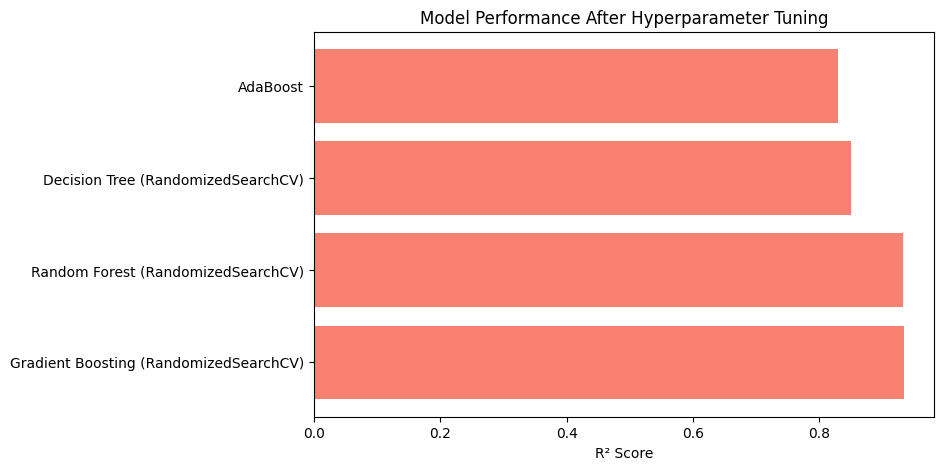

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.barh(results_df['Model'], results_df['R²'], color='salmon')
plt.xlabel('R² Score')
plt.title('Model Performance After Hyperparameter Tuning')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

tmp = results_df.sort_values(by="R²", ascending=True)

plt.figure(figsize=(8,5))
plt.barh(tmp["Model"], tmp["R²"])
plt.title("Model Performance (R²)")
plt.xlabel("R²")
plt.show()

plt.figure(figsize=(8,5))
plt.barh(tmp["Model"], tmp["RMSE"])
plt.title("Model Error (RMSE)")
plt.xlabel("RMSE")
plt.show()


### Model Evaluation Summary

We evaluated several regression models to predict car selling prices.  
The following metrics were used: **MAE**, **MSE**, **RMSE**, and **R²**.

**Key findings:**
- **Random Forest** achieved the best overall performance (R² = 0.93), indicating strong predictive power and stability.  
- **Bagging (Decision Tree)** performed nearly as well, confirming the benefit of ensemble averaging.  
- **Gradient Boosting** also showed robust performance, slightly below Random Forest.  
- **Linear Regression** and **KNN** achieved decent but weaker results, as expected for non-ensemble methods.  
- **AdaBoost** underperformed, possibly due to sensitivity to outliers and non-linear relationships.

In conclusion, **Random Forest** was selected as the best model for further optimization (hyperparameter tuning) because it provides the best balance between bias and variance.
